In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:

# Grouping by 'Order Date', 'Product ID', 'Category', and 'Sub-Category' and counting the rows
grouped_df = df.groupby(['Order Date', 'Category']).size().reset_index(name='sales')


In [19]:
grouped_df.head(5)

,Order Date,Product ID,Category,Sub-Category,sales
0,01/01/2018,FUR-CH-10003199,Furniture,Chairs,1
1,01/01/2018,FUR-FU-10001215,Furniture,Furnishings,1
2,01/01/2018,FUR-FU-10002116,Furniture,Furnishings,1
3,01/01/2018,FUR-FU-10003878,Furniture,Furnishings,1
4,01/01/2018,OFF-AP-10004708,Office Supplies,Appliances,1


array([[<Axes: title={'center': 'sales'}>]], dtype=object)

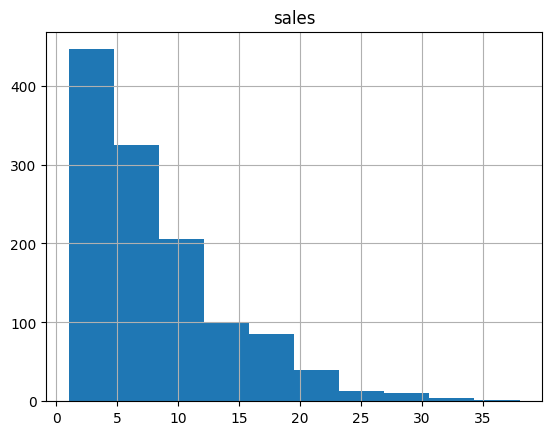

In [9]:
grouped_df.groupby(['Order Date']).sum('sales').hist()

Furniture
877
Office Supplies
1143
Technology
819


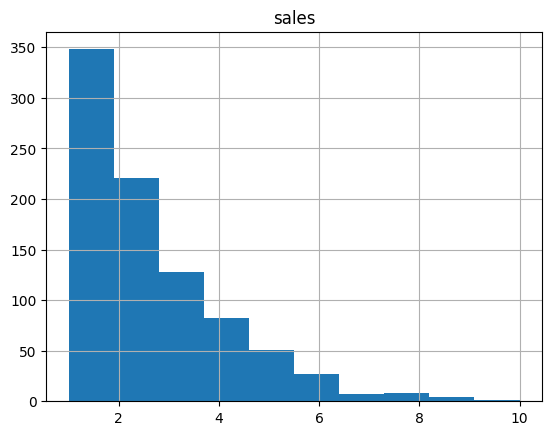

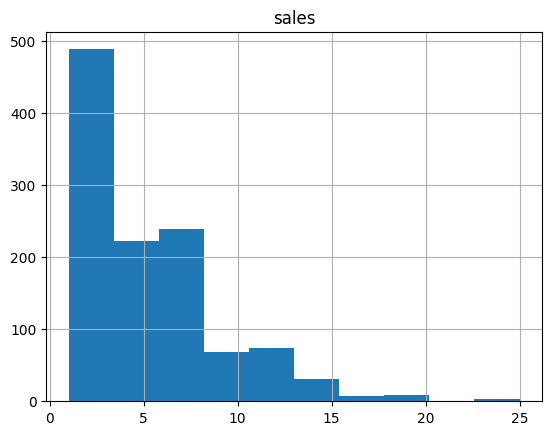

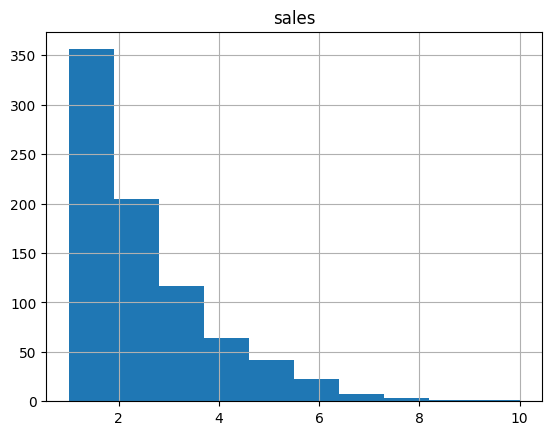

In [17]:
for category in grouped_df['Category'].unique():
    grouped_df[grouped_df['Category'] == category].groupby(['Order Date']).sum('sales').hist()
    print(category)
    print(len(grouped_df[grouped_df['Category'] == category].groupby(['Order Date'])))
